### 14. Apply LabelEncoder, OneHotEncoder, and OrdinalEncoder to a sample dataset and compare the resulting feature space dimensions.

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

In [102]:
sample_data={'color':['red','green','blue','green'],'size':[1,2,3,4]}
data = pd.DataFrame(sample_data)
data2=data.copy()

#### LabelEncoder

In [103]:
le = LabelEncoder()
data2 = pd.DataFrame(le.fit_transform(data2['color']),columns=['color'])
data2

,color
0,2
1,1
2,0
3,1


data1

In [104]:
data1

,color_blue,color_green,color_red,size_1,size_2,size_3,size_4
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### OneHotEncoder

In [105]:
OHE = OneHotEncoder(sparse_output=False)
data1 = data.copy()
col = data1.columns
transformed_data = OHE.fit_transform(data1)

data1 = pd.DataFrame(
    transformed_data, 
    columns=OHE.get_feature_names_out(data1.columns)
)

data1

,color_blue,color_green,color_red,size_1,size_2,size_3,size_4
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### OrdinalEncoder (assigns each unique category a numeric label (integer) based on alphabetical order by default.)

In [106]:
# sample_data={'height':['low','high','very high','medium']}
# data = pd.DataFrame(sample_data)
data3=data.copy()
le = OrdinalEncoder()
data3 = pd.DataFrame(le.fit_transform(data3),columns=data.columns)
data3

,color,size
0,2.0,0.0
1,1.0,1.0
2,0.0,2.0
3,1.0,3.0


In [81]:
# compare the dimension of all three encoding
print(data1.shape,data2.shape,data3.shape)

(4, 3) (4, 1) (4, 1)


### 15. Apply both StandardScaler and MinMaxScaler on any numerical dataset and visualize the difference using boxplots. 

In [56]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [57]:
data = pd.read_csv("D:\Advanced_training\Advanced-training-Python-AIML\Day-4\Datasets\california_housing_train.csv")

In [58]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


### StandardScaler

In [65]:
scaler_std = StandardScaler() # standard scaller
data1 = data.copy()
col = data1.columns
data1 = scaler_std.fit_transform(data1) # it give numpy array
data1 =pd.DataFrame(data1,columns=col) # change into dataframe

In [66]:
data1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543,-1.210558
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483,-1.096745
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105,-1.048461
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600,-1.154514
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454,-1.222629
...,...,...,...,...,...,...,...,...,...
16995,-2.342963,2.318265,1.859971,-0.195728,-0.344995,-0.455275,-0.343872,-0.799999,-0.826872
16996,-2.347950,2.369733,0.588774,-0.135174,-0.027073,-0.205236,-0.094203,-0.715727,-1.106230
16997,-2.362912,2.907801,-0.920772,0.015292,-0.019955,-0.161675,-0.117609,-0.446663,-0.894125
16998,-2.362912,2.889085,-0.761872,0.012999,0.029868,-0.114630,-0.060394,-0.997787,-1.047599


### MinMaxScaler

In [69]:
scaler_std = MinMaxScaler() # MinMax scaler use for scalling
data2 = data.copy()
col = data2.columns
data2 = scaler_std.fit_transform(data2) # it give numpy array
data2 =pd.DataFrame(data2,columns=col) # change into dataframe

In [70]:
data2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125
...,...,...,...,...,...,...,...,...,...
16995,0.008964,0.854410,1.000000,0.058389,0.060987,0.025337,0.060516,0.128081,0.198764
16996,0.007968,0.866100,0.686275,0.061869,0.081782,0.033381,0.076303,0.139170,0.131960
16997,0.004980,0.988310,0.313725,0.070515,0.082247,0.034782,0.074823,0.174577,0.182682
16998,0.004980,0.984060,0.352941,0.070384,0.085506,0.036296,0.078441,0.102054,0.145981


### 16. Create equal-width and equal-frequency bins for an “Age” column in a dataset and visualize using histograms. 

In [119]:
Age_column={'age':[18,22,25,30,35,40,45,50,55,60]}
Age_data = pd.DataFrame(Age_column)
Age_data


,age
0,18
1,22
2,25
3,30
4,35
5,40
6,45
7,50
8,55
9,60


### equal-width

In [120]:
Age_data['age_label'] = pd.cut(Age_data['age'],bins=3,labels=['child','young','old'])

In [121]:
Age_data

,age,age_label
0,18,child
1,22,child
2,25,child
3,30,child
4,35,young
5,40,young
6,45,young
7,50,old
8,55,old
9,60,old


### equal-frequency

In [124]:
# data['Income_bin_freq'] = pd.qcut(data['median_income'],q=4,labels=['low','medium','High','Very High'])
Age_data['age_label_freq'] = pd.qcut(Age_data['age'],q=3,labels=['child','young','old'])

In [125]:
Age_data

,age,age_label,age_label_freq
0,18,child,child
1,22,child,child
2,25,child,child
3,30,child,young
4,35,young,young
5,40,young,young
6,45,young,old
7,50,old,old
8,55,old,old
9,60,old,old


<Axes: xlabel='age', ylabel='Count'>

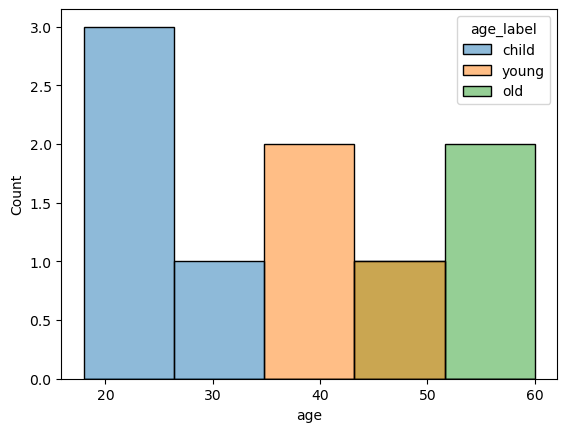

In [137]:
sns.histplot(data=Age_data,x='age',hue='age_label')

<Axes: xlabel='age_label_freq', ylabel='Count'>

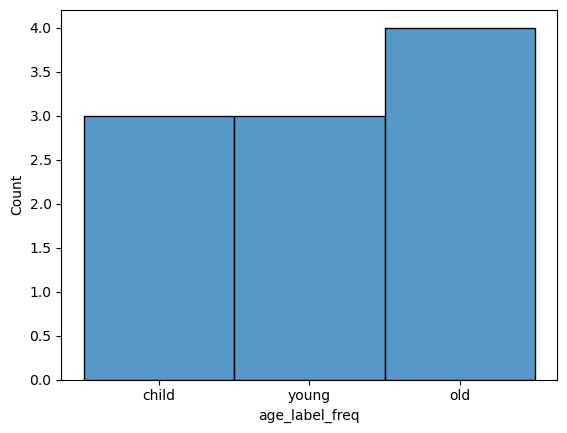

In [140]:
sns.histplot(data=Age_data,x='age_label_freq')

### 17. Create custom bins for a “Salary” column — for example: Low (<30K), Medium (30K–70K), High (>70K) — and encode them using OrdinalEncoder. 

In [149]:
 # Custom Bin
salary_data = {'salary':[10,20,2345,30,40,50,60,70,100,101,230,1234]}
salary_data = pd.DataFrame(salary_data)
bins = [0,30,70,salary_data['salary'].max()]
labels = ['Low','Medium','High']
salary_data['custom_salary'] = pd.cut(salary_data['salary'],bins=bins,labels=labels)

In [150]:
salary_data

,salary,custom_salary
0,10,Low
1,20,Low
2,2345,High
3,30,Low
4,40,Medium
5,50,Medium
6,60,Medium
7,70,Medium
8,100,High
9,101,High
